In [31]:
# dataset from here:
# https://www.kaggle.com/datasets/lantian773030/pokemonclassification

# base code from here:
#https://datagen.tech/guides/computer-vision/resnet-50/

In [21]:
from torchvision.models import resnet50, ResNet50_Weights


# Best available weights (currently alias for IMAGENET1K_V2)
# Note that these weights may change across versions
resnet50(weights=ResNet50_Weights.DEFAULT)



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [22]:
import matplotlib.pyplot as plt

import numpy as np

import PIL as image_lib

import tensorflow as tflow

from tensorflow.keras.layers import Flatten

import keras
from keras.layers import Dense, Activation, Dropout, Reshape, Permute

from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import SGD

In [23]:
import pathlib



data_directory = pathlib.Path("/Users/markying/Desktop/filtered")

In [24]:
img_height,img_width=180,180

batch_size=32

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 6820 files belonging to 150 classes.
Using 5456 files for training.


In [25]:
validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)



Found 6820 files belonging to 150 classes.
Using 1364 files for validation.


2024-05-04 15:41:19.758298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


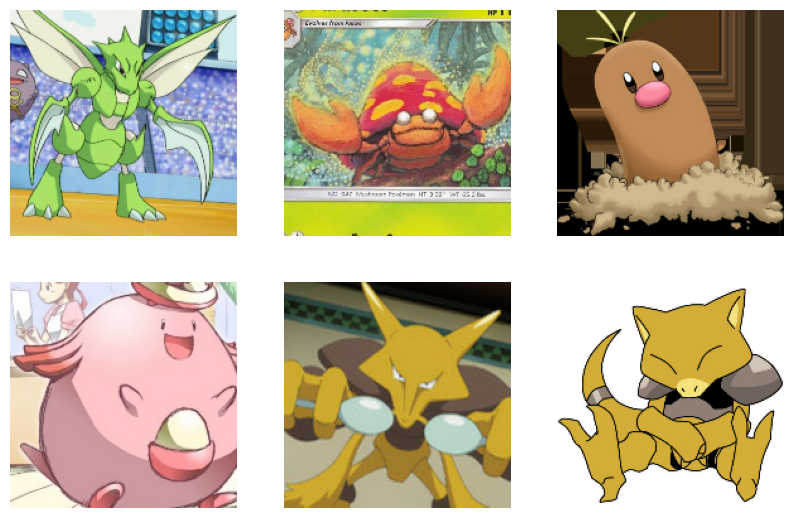

In [26]:
import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10

for images, labels in train_ds.take(1):

  for var in range(6):

    ax = plt.subplot(3, 3, var + 1)

    plotter_lib.imshow(images[var].numpy().astype("uint8"))

    plotter_lib.axis("off")

In [27]:
demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet50(include_top=False,

                   input_shape=(180,180,3),

                   pooling='avg',classes=150,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)

In [28]:
demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))

demo_resnet_model.add(Dense(150, activation='softmax'))

In [29]:
demo_resnet_model.compile(optimizer=SGD(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/10


2024-05-04 15:41:23.988864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/171 [========>.....................] - ETA: 1:23 - loss: 5.0780 - accuracy: 0.0214

2024-05-04 15:42:02.876435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/171 [=========>....................] - ETA: 1:21 - loss: 5.0479 - accuracy: 0.0240

2024-05-04 15:42:08.182628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/171 [===========>..................] - ETA: 1:13 - loss: 4.9850 - accuracy: 0.0290

2024-05-04 15:42:16.641028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/171 [=====================>........] - ETA: 28s - loss: 4.7196 - accuracy: 0.0694

2024-05-04 15:42:56.970105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/171 [=======================>......] - ETA: 24s - loss: 4.6959 - accuracy: 0.0721

2024-05-04 15:43:01.877622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - ETA: 0s - loss: 4.5544 - accuracy: 0.0962

2024-05-04 15:43:40.642570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - 152s 879ms/step - loss: 4.5544 - accuracy: 0.0962 - val_loss: 3.7949 - val_accuracy: 0.2199
Epoch 2/10


2024-05-04 15:43:54.506896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/171 [========>.....................] - ETA: 1:16 - loss: 3.3785 - accuracy: 0.3310

2024-05-04 15:44:30.157854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/171 [=========>....................] - ETA: 1:13 - loss: 3.3564 - accuracy: 0.3359

2024-05-04 15:44:34.353783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/171 [===========>..................] - ETA: 1:06 - loss: 3.3367 - accuracy: 0.3363

2024-05-04 15:44:41.789817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/171 [=====================>........] - ETA: 26s - loss: 3.1338 - accuracy: 0.3724

2024-05-04 15:45:22.029655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/171 [=======================>......] - ETA: 22s - loss: 3.1153 - accuracy: 0.3773

2024-05-04 15:45:25.943246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - ETA: 0s - loss: 3.0228 - accuracy: 0.3939

2024-05-04 15:46:02.138948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - 142s 827ms/step - loss: 3.0228 - accuracy: 0.3939 - val_loss: 2.6762 - val_accuracy: 0.4333
Epoch 3/10


2024-05-04 15:46:16.135239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/171 [========>.....................] - ETA: 1:18 - loss: 2.1603 - accuracy: 0.5770

2024-05-04 15:46:52.845038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/171 [=========>....................] - ETA: 1:14 - loss: 2.1597 - accuracy: 0.5771

2024-05-04 15:46:56.899982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/171 [===========>..................] - ETA: 1:07 - loss: 2.1372 - accuracy: 0.5832

2024-05-04 15:47:04.604758: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/171 [=====================>........] - ETA: 27s - loss: 2.0478 - accuracy: 0.5988

2024-05-04 15:47:46.297266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/171 [=======================>......] - ETA: 23s - loss: 2.0412 - accuracy: 0.5985

2024-05-04 15:47:50.308220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - ETA: 0s - loss: 1.9886 - accuracy: 0.6103

2024-05-04 15:48:27.353056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - 146s 852ms/step - loss: 1.9886 - accuracy: 0.6103 - val_loss: 2.0095 - val_accuracy: 0.5506
Epoch 4/10


2024-05-04 15:48:41.961218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/171 [========>.....................] - ETA: 1:20 - loss: 1.4843 - accuracy: 0.7234

2024-05-04 15:49:19.209810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/171 [=========>....................] - ETA: 1:15 - loss: 1.4743 - accuracy: 0.7255

2024-05-04 15:49:23.322060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/171 [===========>..................] - ETA: 1:08 - loss: 1.4739 - accuracy: 0.7192

2024-05-04 15:49:31.018367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/171 [=====================>........] - ETA: 27s - loss: 1.4251 - accuracy: 0.7271

2024-05-04 15:50:12.156053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/171 [=======================>......] - ETA: 23s - loss: 1.4265 - accuracy: 0.7260

2024-05-04 15:50:16.166704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - ETA: 0s - loss: 1.4004 - accuracy: 0.7298

2024-05-04 15:50:53.053234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - 146s 852ms/step - loss: 1.4004 - accuracy: 0.7298 - val_loss: 1.6670 - val_accuracy: 0.6195
Epoch 5/10


2024-05-04 15:51:07.803477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/171 [========>.....................] - ETA: 1:19 - loss: 1.1006 - accuracy: 0.8003

2024-05-04 15:51:44.800642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/171 [=========>....................] - ETA: 1:15 - loss: 1.0993 - accuracy: 0.7995

2024-05-04 15:51:48.867002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/171 [===========>..................] - ETA: 1:08 - loss: 1.0882 - accuracy: 0.8019

2024-05-04 15:51:56.423078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/171 [=====================>........] - ETA: 27s - loss: 1.0748 - accuracy: 0.8044

2024-05-04 15:52:37.787807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/171 [=======================>......] - ETA: 23s - loss: 1.0733 - accuracy: 0.8041

2024-05-04 15:52:41.990373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - ETA: 0s - loss: 1.0600 - accuracy: 0.8055

2024-05-04 15:53:21.779117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - 149s 873ms/step - loss: 1.0600 - accuracy: 0.8055 - val_loss: 1.4867 - val_accuracy: 0.6430
Epoch 6/10


2024-05-04 15:53:37.174538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/171 [========>.....................] - ETA: 1:23 - loss: 0.8656 - accuracy: 0.8605

2024-05-04 15:54:15.911191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/171 [=========>....................] - ETA: 1:18 - loss: 0.8636 - accuracy: 0.8604

2024-05-04 15:54:19.911495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/171 [===========>..................] - ETA: 1:09 - loss: 0.8535 - accuracy: 0.8605

2024-05-04 15:54:27.112711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/171 [=====================>........] - ETA: 27s - loss: 0.8582 - accuracy: 0.8492

2024-05-04 15:55:07.586161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/171 [=======================>......] - ETA: 23s - loss: 0.8581 - accuracy: 0.8499

2024-05-04 15:55:11.518608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - ETA: 0s - loss: 0.8446 - accuracy: 0.8503

2024-05-04 15:55:48.292982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - 146s 852ms/step - loss: 0.8446 - accuracy: 0.8503 - val_loss: 1.3308 - val_accuracy: 0.6716
Epoch 7/10


2024-05-04 15:56:03.157581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/171 [========>.....................] - ETA: 1:19 - loss: 0.6925 - accuracy: 0.8900

2024-05-04 15:56:40.097333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/171 [=========>....................] - ETA: 1:15 - loss: 0.6936 - accuracy: 0.8859

2024-05-04 15:56:44.152839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/171 [===========>..................] - ETA: 1:07 - loss: 0.6837 - accuracy: 0.8882

2024-05-04 15:56:51.601646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/171 [=====================>........] - ETA: 27s - loss: 0.6973 - accuracy: 0.8833

2024-05-04 15:57:33.240006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/171 [=======================>......] - ETA: 23s - loss: 0.6986 - accuracy: 0.8832

2024-05-04 15:57:37.177435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - ETA: 0s - loss: 0.6886 - accuracy: 0.8851

2024-05-04 15:58:15.248333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - 147s 857ms/step - loss: 0.6886 - accuracy: 0.8851 - val_loss: 1.2949 - val_accuracy: 0.6664
Epoch 8/10


2024-05-04 15:58:29.806870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/171 [========>.....................] - ETA: 1:21 - loss: 0.6025 - accuracy: 0.9039

2024-05-04 15:59:07.801497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/171 [=========>....................] - ETA: 1:17 - loss: 0.5954 - accuracy: 0.9031

2024-05-04 15:59:12.149269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/171 [===========>..................] - ETA: 1:10 - loss: 0.5895 - accuracy: 0.9067

2024-05-04 15:59:19.767655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/171 [=====================>........] - ETA: 28s - loss: 0.5909 - accuracy: 0.9005

2024-05-04 16:00:04.887380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/171 [=======================>......] - ETA: 24s - loss: 0.5859 - accuracy: 0.9017

2024-05-04 16:00:09.343323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - ETA: 0s - loss: 0.5817 - accuracy: 0.9025

2024-05-04 16:00:47.542763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - 154s 900ms/step - loss: 0.5817 - accuracy: 0.9025 - val_loss: 1.1670 - val_accuracy: 0.6994
Epoch 9/10


2024-05-04 16:01:03.748106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/171 [========>.....................] - ETA: 1:20 - loss: 0.5021 - accuracy: 0.9248

2024-05-04 16:01:41.149799: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/171 [=========>....................] - ETA: 1:15 - loss: 0.5048 - accuracy: 0.9229

2024-05-04 16:01:45.136300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/171 [===========>..................] - ETA: 1:07 - loss: 0.5009 - accuracy: 0.9230

2024-05-04 16:01:52.400577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/171 [=====================>........] - ETA: 27s - loss: 0.4996 - accuracy: 0.9218

2024-05-04 16:02:32.933467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/171 [=======================>......] - ETA: 23s - loss: 0.4960 - accuracy: 0.9231

2024-05-04 16:02:36.895710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - ETA: 0s - loss: 0.4938 - accuracy: 0.9243

2024-05-04 16:03:13.924846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - 145s 844ms/step - loss: 0.4938 - accuracy: 0.9243 - val_loss: 1.1142 - val_accuracy: 0.7192
Epoch 10/10


2024-05-04 16:03:28.329062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/171 [========>.....................] - ETA: 1:19 - loss: 0.4308 - accuracy: 0.9375

2024-05-04 16:04:05.239230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/171 [=========>....................] - ETA: 1:15 - loss: 0.4285 - accuracy: 0.9391

2024-05-04 16:04:09.417048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/171 [===========>..................] - ETA: 1:07 - loss: 0.4262 - accuracy: 0.9406

2024-05-04 16:04:16.724127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/171 [=====================>........] - ETA: 26s - loss: 0.4335 - accuracy: 0.9389

2024-05-04 16:04:56.960259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/171 [=======================>......] - ETA: 22s - loss: 0.4302 - accuracy: 0.9389

2024-05-04 16:05:01.271857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - ETA: 0s - loss: 0.4264 - accuracy: 0.9401

2024-05-04 16:05:39.236715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/171 [==============================] - 149s 873ms/step - loss: 0.4264 - accuracy: 0.9401 - val_loss: 1.0645 - val_accuracy: 0.7339


[0.21994134783744812, 0.4332844614982605, 0.5505865216255188, 0.6195014715194702, 0.642961859703064, 0.6715542674064636, 0.6664223074913025, 0.6994134783744812, 0.7192082405090332, 0.7338709831237793]


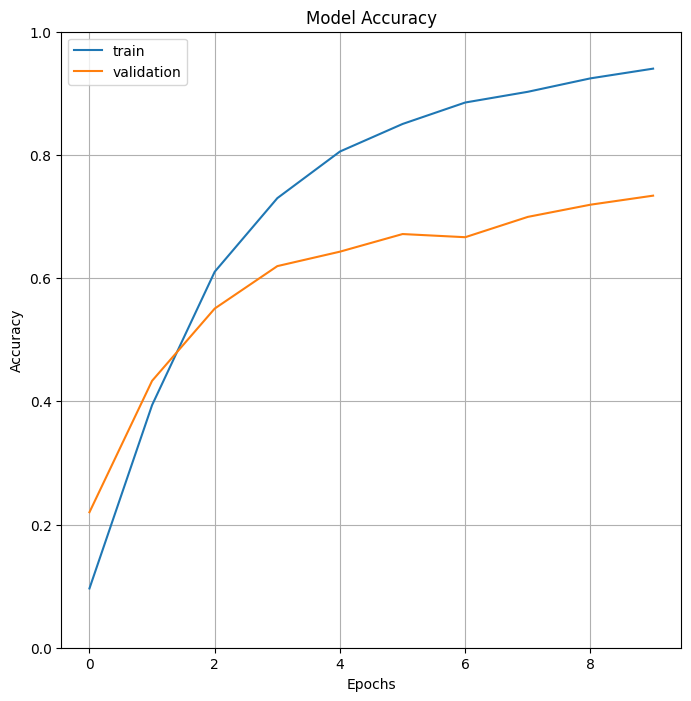

In [30]:
plotter_lib.figure(figsize=(8, 8))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.0,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

print(history.history['val_accuracy'])